<a href="https://colab.research.google.com/github/afiffadhlurrahman/KK-A/blob/main/Tugas4_KKA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving MeterB.csv to MeterB.csv


In [7]:
import pandas as pd 

data = pd.read_csv("MeterB.csv",delimiter="\t",header=None) 
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,1.185089,1.028128,1.016478,0.1500,2.195744,2.540944,2.511961,2.087889,2.394439,1483.869833,1486.382167,1485.372056,1484.989000,1485.153222,5260.655556,5067.588889,4977.822222,4984.077778,5170.311111,5200.205556,4111.527778,4291.850000,9.038944,4.426833,4.504556,9.241222,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,84.107067,84.003098,120.338783,120.144244,120.371772,120.179078,84.019053,83.919971,1
1,1.191806,1.033750,1.019411,0.2170,2.192467,2.546594,2.516744,2.075706,2.396089,1483.747389,1486.259222,1485.250333,1484.867056,1485.030722,5256.227778,5065.400000,4978.022222,4981.433333,5172.344444,5200.816667,4107.144444,4286.327778,9.030167,4.284000,4.597500,9.166444,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,84.114116,84.009973,120.349089,120.153889,120.381700,120.188800,84.025607,83.927260,1
2,1.181983,1.028089,1.020994,0.0889,3.246672,3.738378,3.715217,3.079356,3.523517,1483.777056,1486.288222,1485.281000,1484.898889,1485.061111,5278.550000,5002.900000,4971.044444,4958.055556,5146.377778,5179.372222,4039.272222,4302.883333,9.780722,4.612000,4.544778,10.231167,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,84.137487,83.983336,120.392450,120.106206,120.425422,120.140578,84.047809,83.901593,1
3,1.182761,1.028783,1.021072,0.1170,3.244489,3.741861,3.718839,3.080400,3.525933,1483.847444,1486.357167,1485.350444,1484.970167,1485.131278,5276.144444,4994.794444,4973.305556,4956.305556,5149.922222,5175.688889,4036.355556,4297.377778,9.749389,4.835333,4.749278,10.945056,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,84.133493,83.979407,120.387033,120.100444,120.419883,120.134933,84.043715,83.897597,1
4,1.182272,1.028922,1.021350,0.0222,3.245944,3.742217,3.715456,3.080950,3.525128,1483.819056,1486.328444,1485.320500,1484.944333,1485.103278,5272.716667,4993.561111,4969.877778,4952.244444,5147.422222,5174.011111,4035.338889,4297.572222,9.602333,4.479889,4.716833,9.984056,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,84.135354,83.980807,120.389361,120.102800,120.422050,120.137472,84.045346,83.898959,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2.418111,0.000000,0.000000,0.0000,5.332300,6.662456,6.288444,0.000000,5.922272,1550.598167,1514.837722,1516.918111,0.000000,1527.452111,126.551166,188.576672,1547.186278,2372.372333,609.580089,824.413989,0.000000,0.000000,23.878667,5.989722,6.529556,0.000000,63.750000,65.016667,75.316667,91.172222,91.250000,93.038889,93.038889,0.211111,0.355556,87.543889,87.543889,79.873333,79.873333,82.130556,82.130556,96.462778,96.462778,80.552229,80.323852,118.229294,117.738550,118.007206,117.542750,0.000000,0.000000,3
88,3.290425,0.000000,0.000000,0.0000,5.420572,6.653589,6.309761,0.000000,5.924100,1542.063444,1514.835889,1516.951389,0.000000,1527.424278,123.475461,197.298350,1605.865611,2354.717556,620.432450,843.762544,0.000000,0.000000,24.409833,6.758722,6.662389,0.000000,62.905556,62.483333,74.011111,90.622222,90.622222,92.272222,92.272222,0.183333,0.288889,87.433889,87.433889,79.853889,79.853889,82.328889,82.328889,96.534444,96.534444,80.10

In [8]:
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split


xu = data.drop(data.columns[51], axis=1)
x = normalize(xu)
x = pd.DataFrame(x, columns=xu.columns)

y = data[51]

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.20)

Akurasi Testing DT: 1.0
Akurasi Testing SVM OVO: 1.0
Akurasi Testing SVM OVR: 1.0
Akurasi Testing MLP: 1.0


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


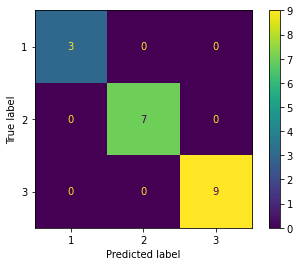

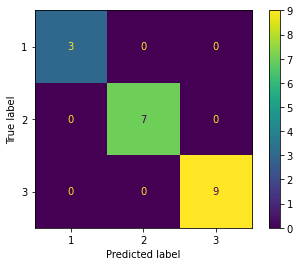

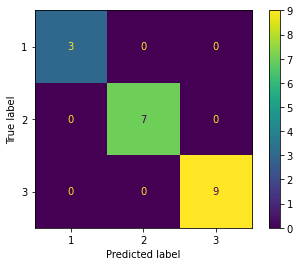

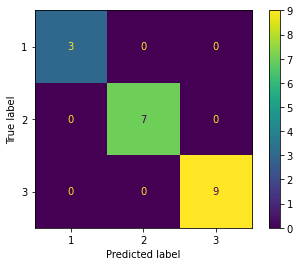

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix

DT = tree.DecisionTreeClassifier(criterion='entropy')
DT = DT.fit(X_train, Y_train)
prediksi_DT = DT.predict(X_test)
acc_DT = accuracy_score(Y_test, prediksi_DT)
print('Akurasi Testing DT:', acc_DT)

dSVM_ovo = svm.SVC(decision_function_shape='ovo') # one versus one SVM
dSVM_ovo.fit(X_train, Y_train)
prediksi_SVM_ovo = dSVM_ovo.predict(X_test)
acc_SVM_ovo = accuracy_score(Y_test, prediksi_SVM_ovo)
print('Akurasi Testing SVM OVO:', acc_SVM_ovo)

dSVM_ova = svm.SVC(decision_function_shape='ovr') # one versus all SVM
dSVM_ova.fit(X_train, Y_train)
prediksi_SVM_ova = dSVM_ova.predict(X_test)
acc_SVM_ova = accuracy_score(Y_test, prediksi_SVM_ova)
print('Akurasi Testing SVM OVR:', acc_SVM_ova)

mlp = MLPClassifier(hidden_layer_sizes=(60, ))
mlp.fit(X_train, Y_train)
prediksi_MLP = mlp.predict(X_test)
acc_MLP = accuracy_score(Y_test, prediksi_MLP)
print('Akurasi Testing MLP:', acc_MLP)

plot_confusion_matrix(DT, X_test, Y_test)
plot_confusion_matrix(dSVM_ovo, X_test, Y_test)
plot_confusion_matrix(dSVM_ova, X_test, Y_test)
plot_confusion_matrix(mlp, X_test, Y_test)